# Advanced Pairs Trading : Kalman Filters

## Import library

In [1]:
import sys
sys.path.append('../../')

In [2]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter

## Getting the Data

In [3]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [4]:
Currency_Pair = 'GBPUSD'

## TF D1

In [5]:
TF = 'D1'

In [6]:
data_1 = XAUUSD[TF]

In [7]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

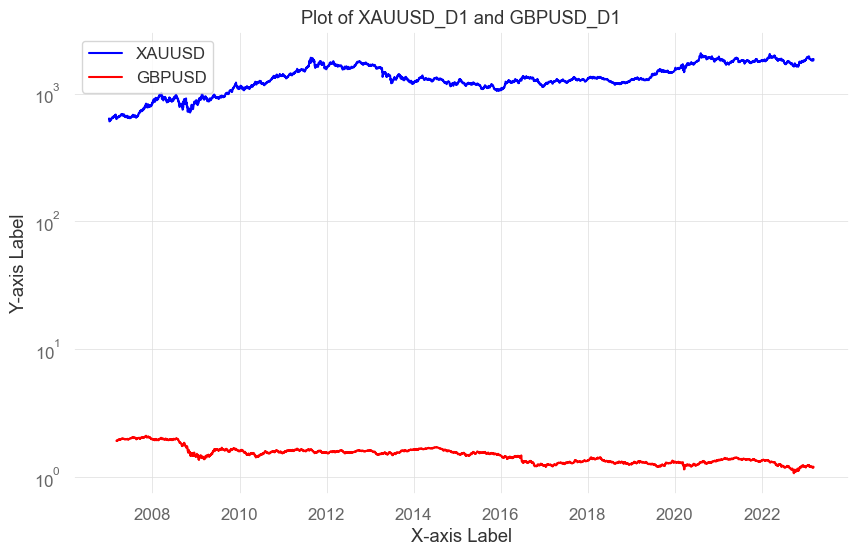

In [8]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [9]:
KF = Kalman_Filter(data_1, data_2)

In [10]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          3.944e+04
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:35:47   Log-Likelihood:                         -37905.
No. Observations:                5011   AIC:                                  7.581e+04
Df Residuals:                    5010   BIC:                                  7.582e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close        866.7286      4.364    198.594      0.000     858.173     875.285
==============================================================================
Omnibus:                      211.399   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.537
Skew:                          -0.534   Prob(JB):                     1.59e-52
Kurtosis:                       3.024   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
result = KF.Run()

### Save Result Backtest 

In [12]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [13]:
filename = f'{Currency_Pair}_{TF}.csv'

In [14]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -100.0%
CAGR﹪                     -36.96%

Sharpe                     -1.4
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -1.17
Sortino                    -1.47
Smart Sortino              -1.23
Sortino/√2                 -1.04
Smart Sortino/√2           -0.87
Omega                      0.63

Max Drawdown               -100.0%
Longest DD Days            5736
Volatility (ann.)          33.78%
Calmar                     -0.37
Skew                       -7.74
Kurtosis                   73.79

Expected Daily %           -0.21%
Expected Monthly %         -5.4%
Expected Yearly %          -46.74%
Kelly Criterion            -30.14%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.69%
Expected Shortfall (cVaR)  -3.69%

Max Consecut

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-10,5736,-99.998457,-99.998370
2,2007-03-06,2007-04-16,2007-06-11,98,-5.264788,-4.897958
3,2007-06-13,2007-06-19,2007-06-20,8,-1.349503,-1.179200
4,2007-06-22,2007-06-22,2007-06-22,1,-0.077332,NaN


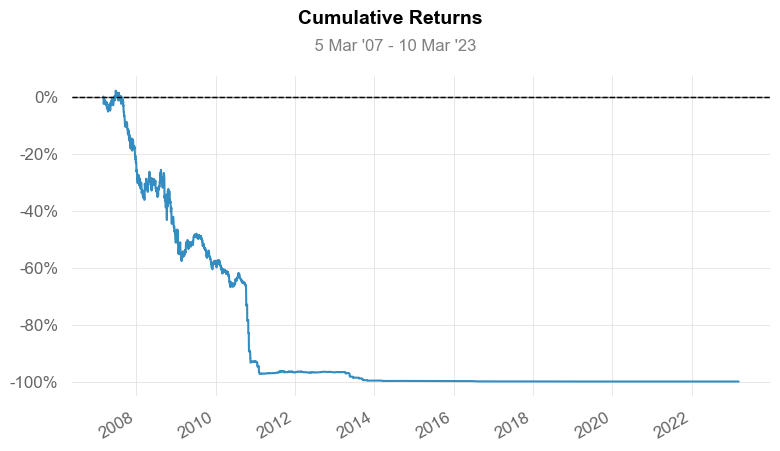

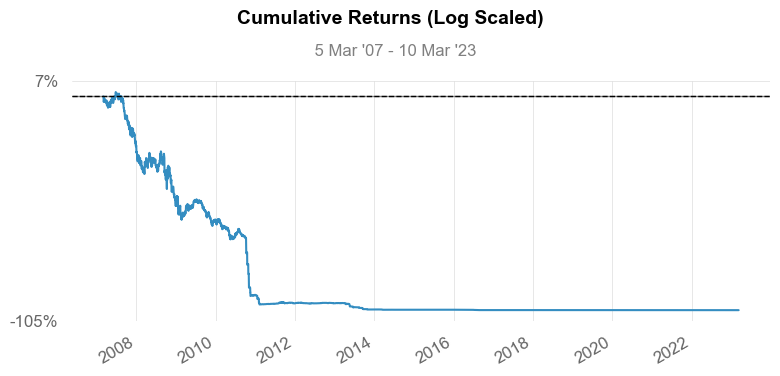

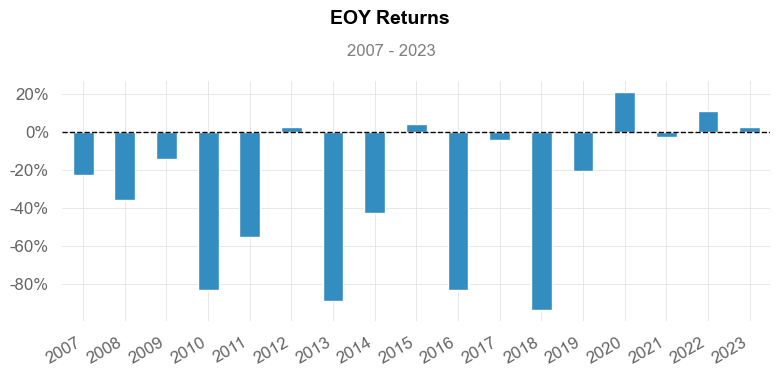

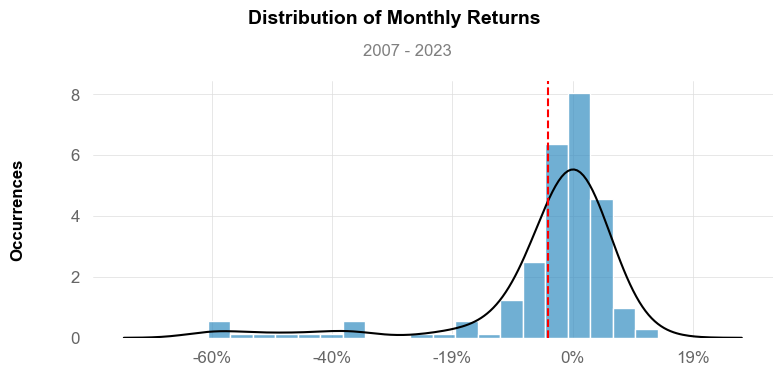

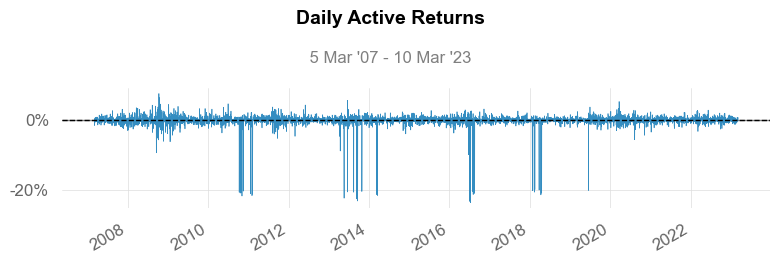

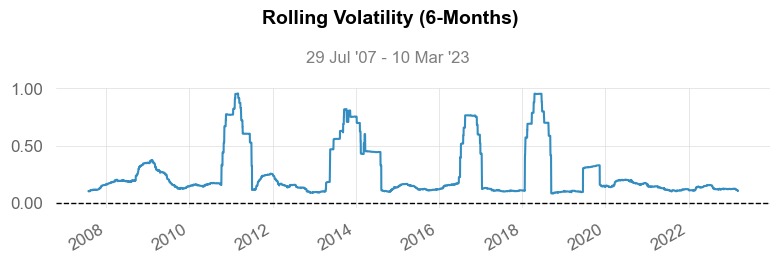

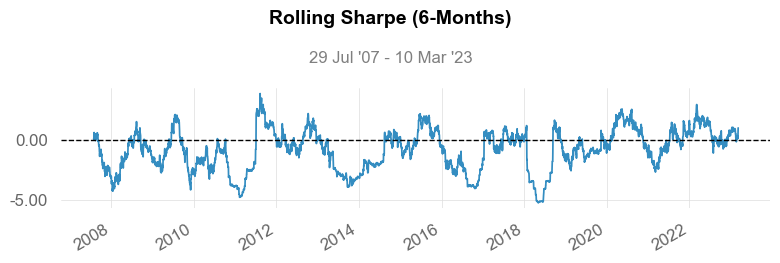

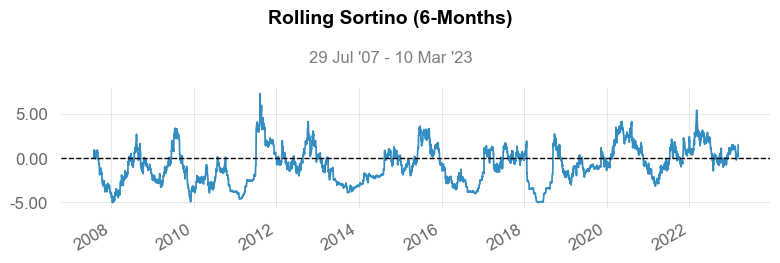

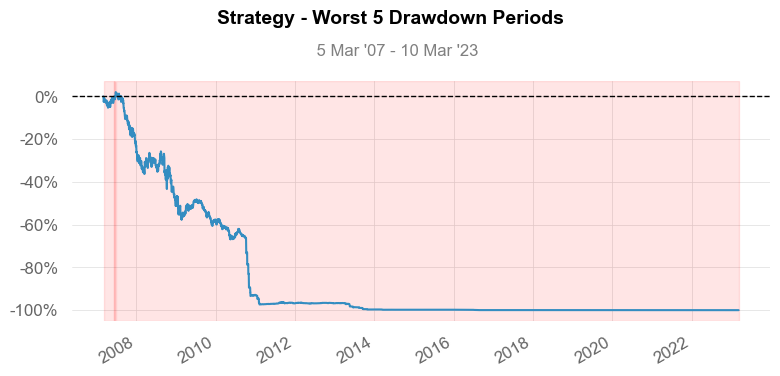

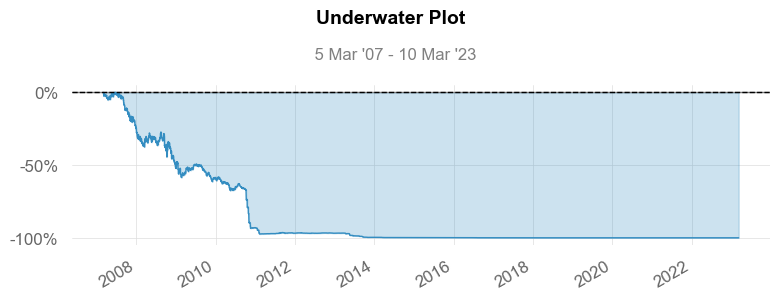

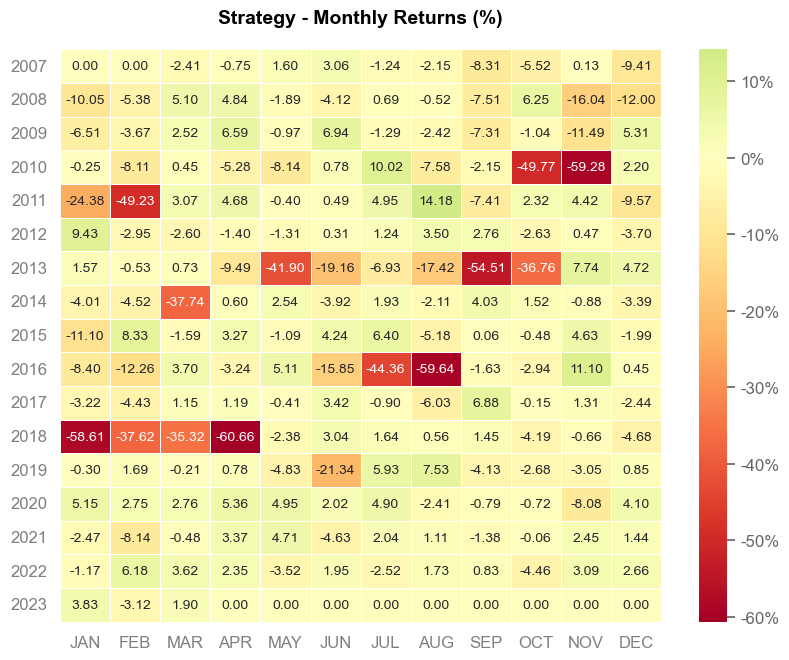

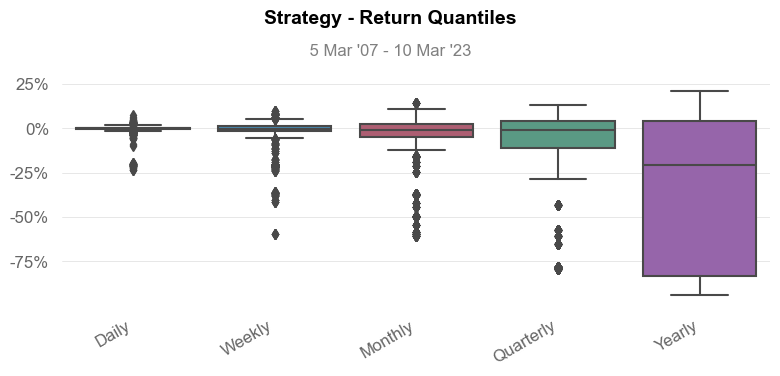

In [15]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H4

In [16]:
TF = 'H4'

In [17]:
data_1 = XAUUSD[TF]

In [18]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

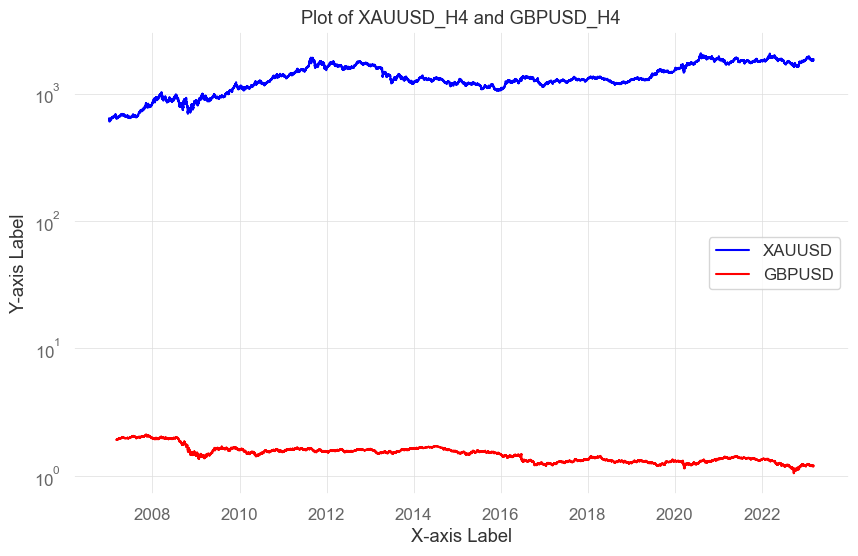

In [19]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [20]:
KF = Kalman_Filter(data_1, data_2)

In [21]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          2.031e+05
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:36:23   Log-Likelihood:                     -1.9552e+05
No. Observations:               25846   AIC:                                  3.910e+05
Df Residuals:                   25845   BIC:                                  3.911e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close        866.4424      1.922    450.697      0.000     862.674     870.210
==============================================================================
Omnibus:                     1089.144   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1232.896
Skew:                          -0.535   Prob(JB):                    1.91e-268
Kurtosis:                       3.021   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
result = KF.Run()

### Save Result Backtest 

In [23]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [24]:
filename = f'{Currency_Pair}_{TF}.csv'

In [25]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -98.25%
CAGR﹪                     -16.0%

Sharpe                     -0.99
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -0.89
Sortino                    -1.0
Smart Sortino              -0.89
Sortino/√2                 -0.71
Smart Sortino/√2           -0.63
Omega                      0.51

Max Drawdown               -98.65%
Longest DD Days            5842
Volatility (ann.)          18.57%
Calmar                     -0.16
Skew                       -16.28
Kurtosis                   277.46

Expected Daily %           -0.08%
Expected Monthly %         -2.07%
Expected Yearly %          -21.18%
Kelly Criterion            -46.34%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.0%
Expected Shortfall (cVaR)  -2.0%

Max Consecut

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-03-13,2019-01-04,2023-03-10,5842,-98.645055,-98.635919
2,2007-03-08,2007-03-09,2007-03-09,2,-0.211843,-0.091538


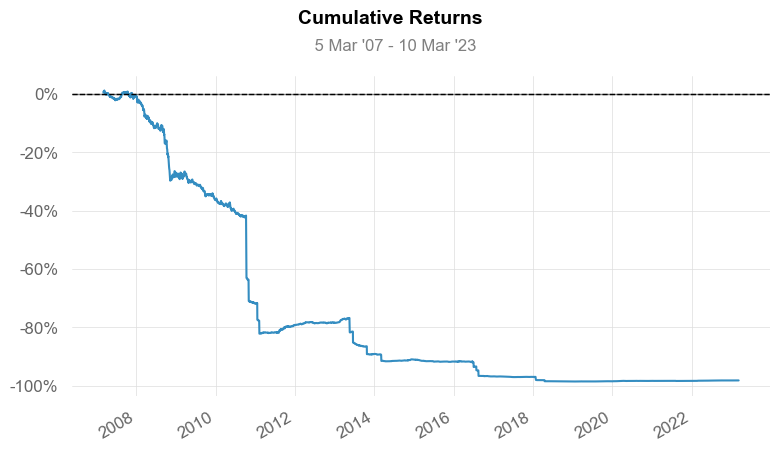

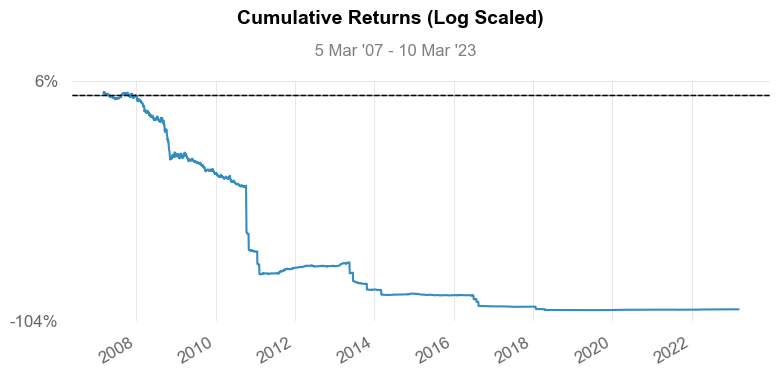

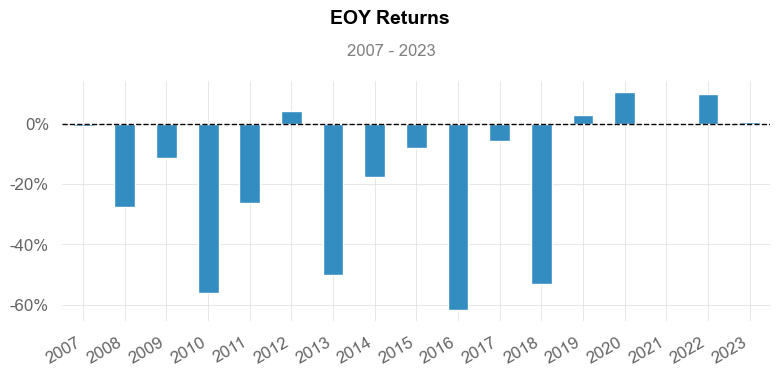

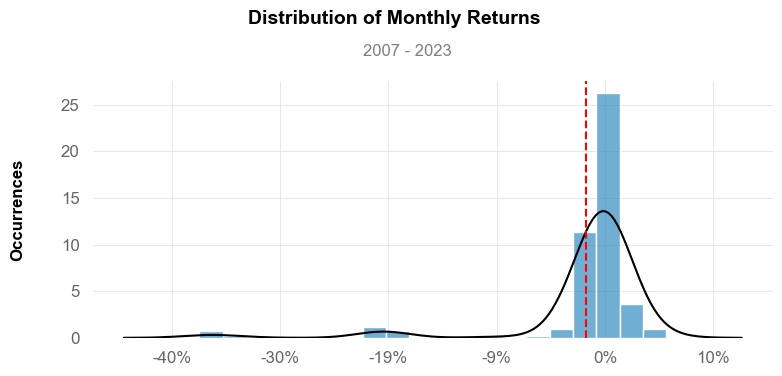

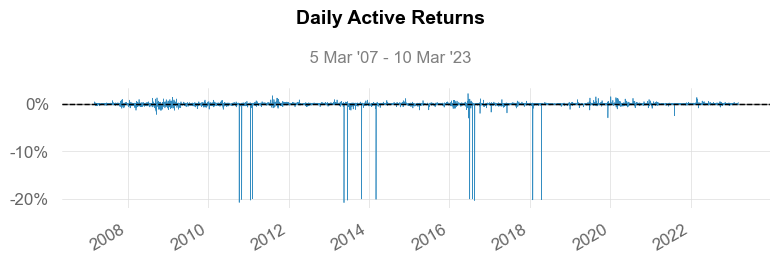

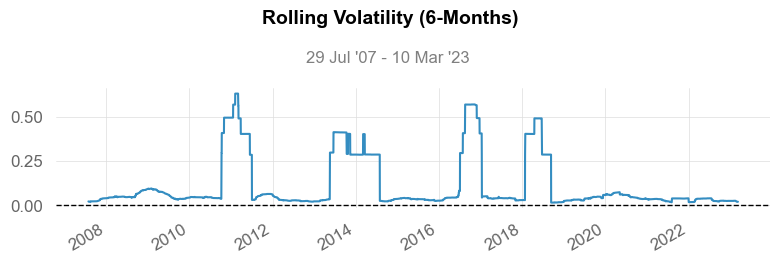

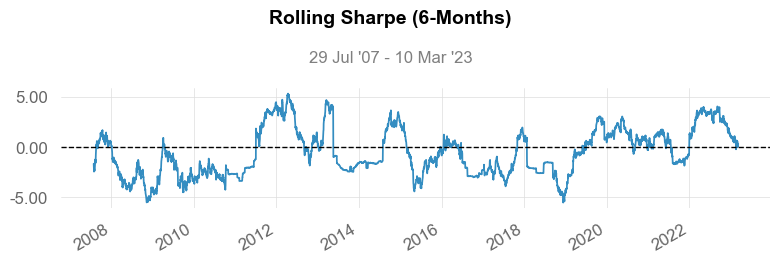

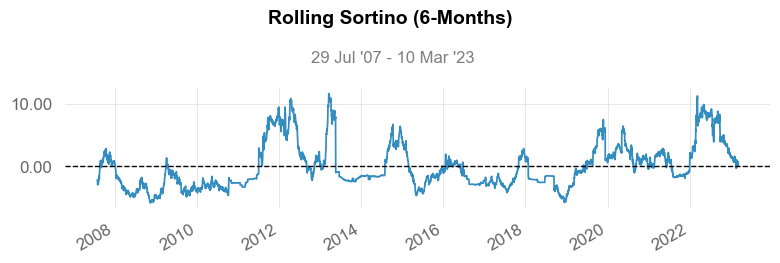

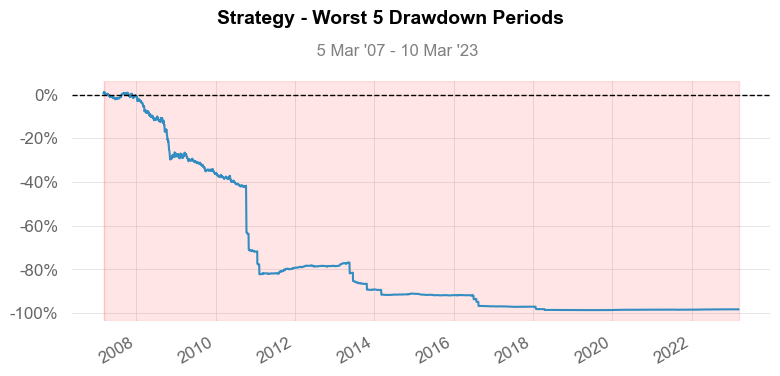

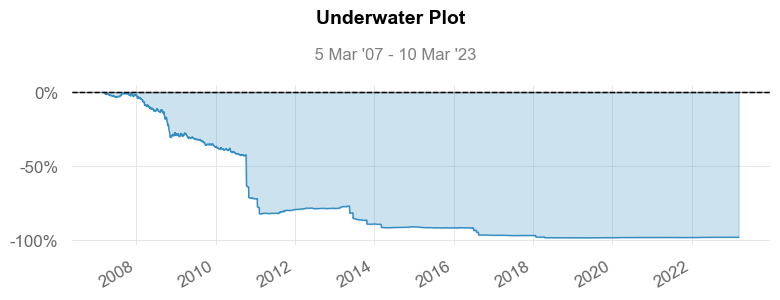

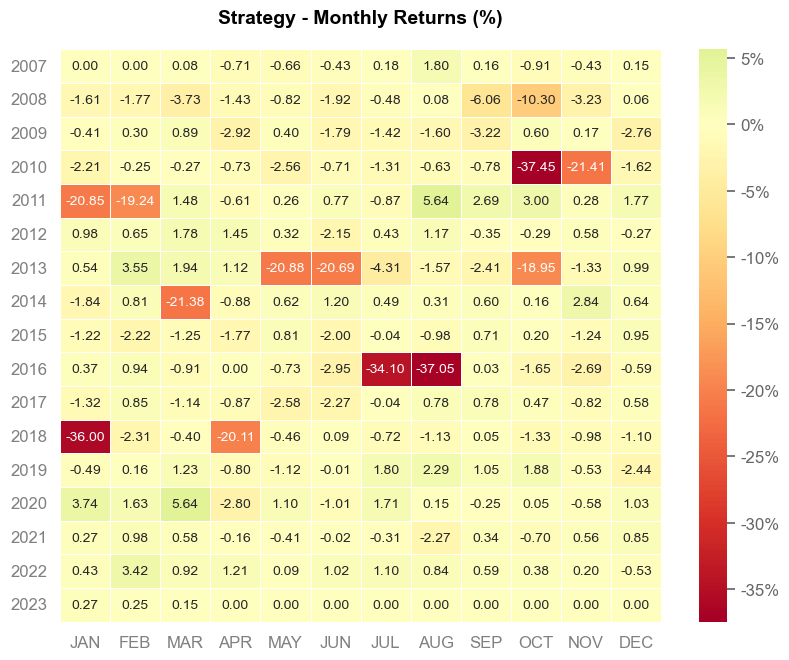

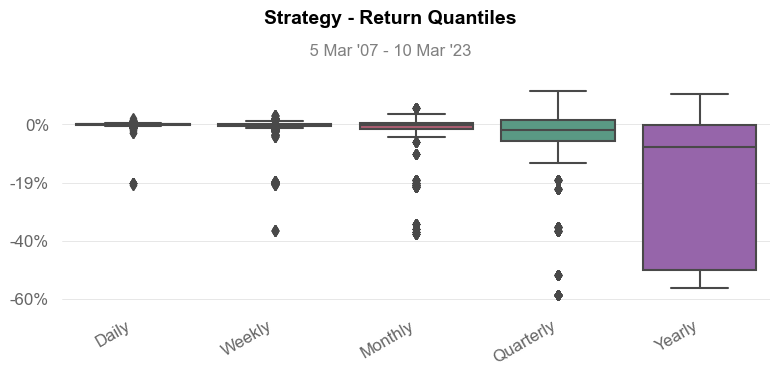

In [26]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H1

In [27]:
TF = 'H1'

In [28]:
data_1 = XAUUSD[TF]

In [29]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

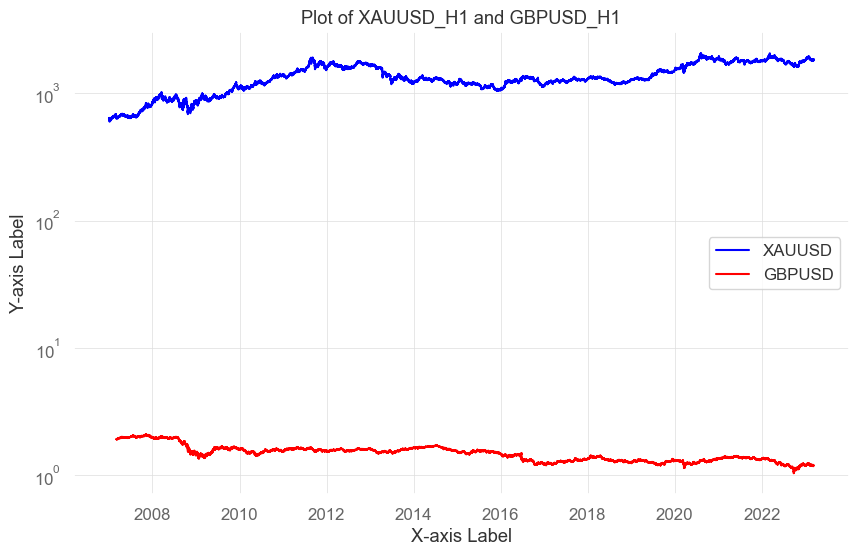

In [30]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [31]:
KF = Kalman_Filter(data_1, data_2)

In [32]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          7.858e+05
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:38:52   Log-Likelihood:                     -7.5654e+05
No. Observations:              100006   AIC:                                  1.513e+06
Df Residuals:                  100005   BIC:                                  1.513e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close        866.3637      0.977    886.448      0.000     864.448     868.279
==============================================================================
Omnibus:                     4209.777   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4767.610
Skew:                          -0.535   Prob(JB):                         0.00
Kurtosis:                       3.020   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
result = KF.Run()

### Save Result Backtest 

In [34]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [35]:
filename = f'{Currency_Pair}_{TF}.csv'

In [36]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -60.92%
CAGR﹪                     -3.97%

Sharpe                     -0.45
Prob. Sharpe Ratio         0.04%
Smart Sharpe               -0.35
Sortino                    -0.46
Smart Sortino              -0.36
Sortino/√2                 -0.32
Smart Sortino/√2           -0.26
Omega                      0.77

Max Drawdown               -72.72%
Longest DD Days            5592
Volatility (ann.)          9.46%
Calmar                     -0.05
Skew                       -30.5
Kurtosis                   1024.6

Expected Daily %           -0.02%
Expected Monthly %         -0.49%
Expected Yearly %          -5.38%
Kelly Criterion            -15.08%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.0%
Expected Shortfall (cVaR)  -1.0%

Max Consecuti

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-11-18,2019-06-03,2023-03-10,5592,-72.722966,-72.620052
2,2007-03-29,2007-07-06,2007-08-17,142,-1.784251,-1.619563
3,2007-09-20,2007-11-01,2007-11-09,51,-0.622986,-0.599643
4,2007-03-15,2007-03-26,2007-03-26,12,-0.407633,-0.302373
5,2007-09-07,2007-09-12,2007-09-13,7,-0.262887,-0.223825


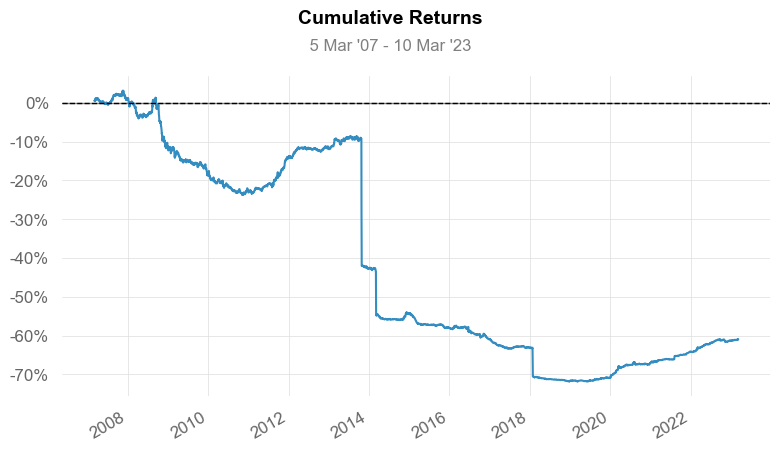

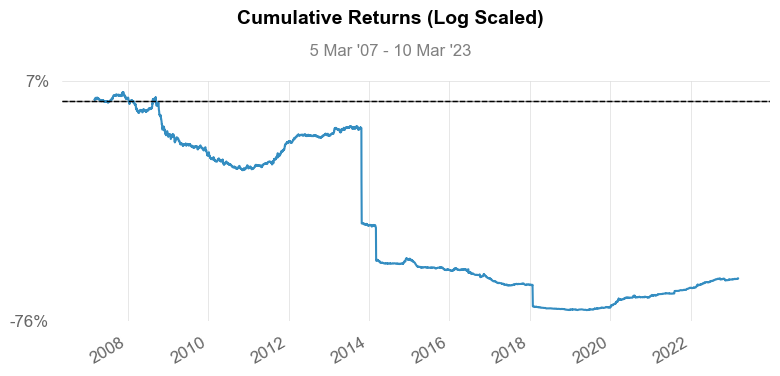

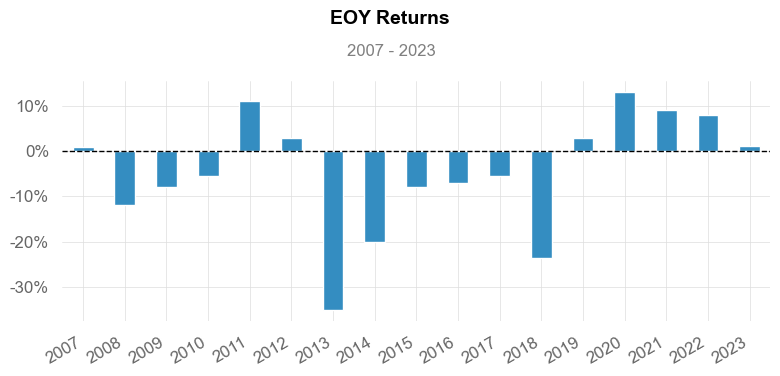

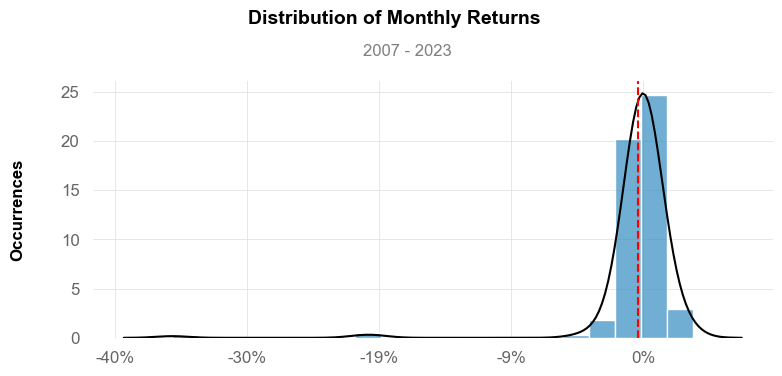

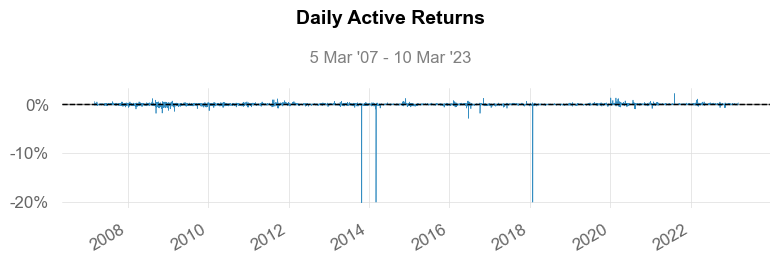

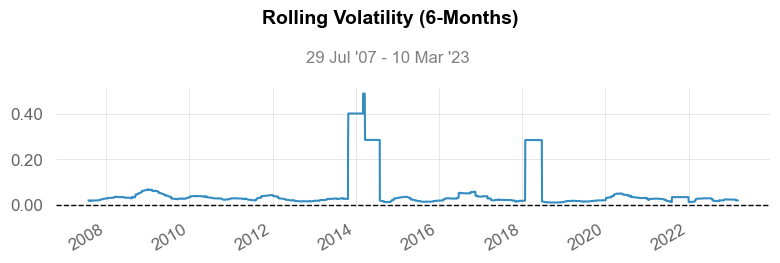

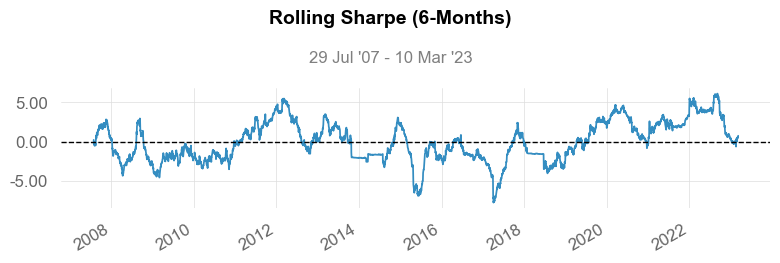

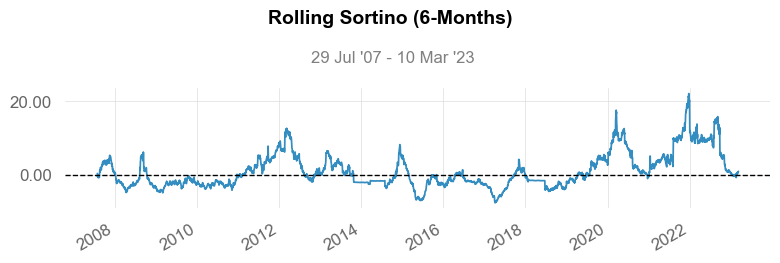

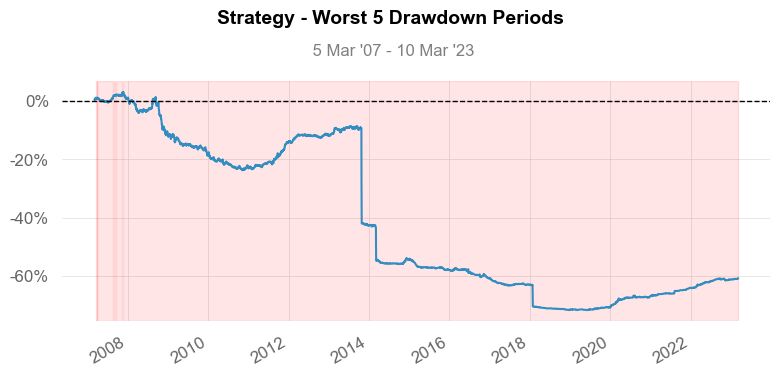

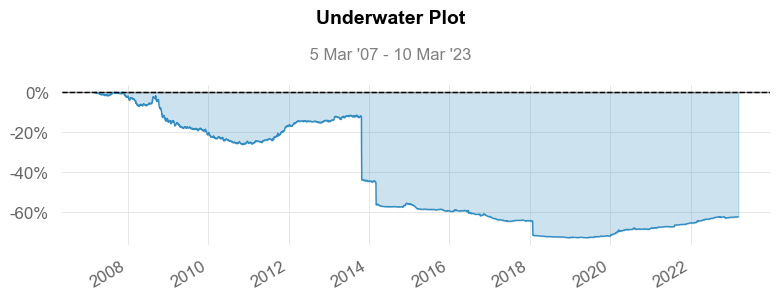

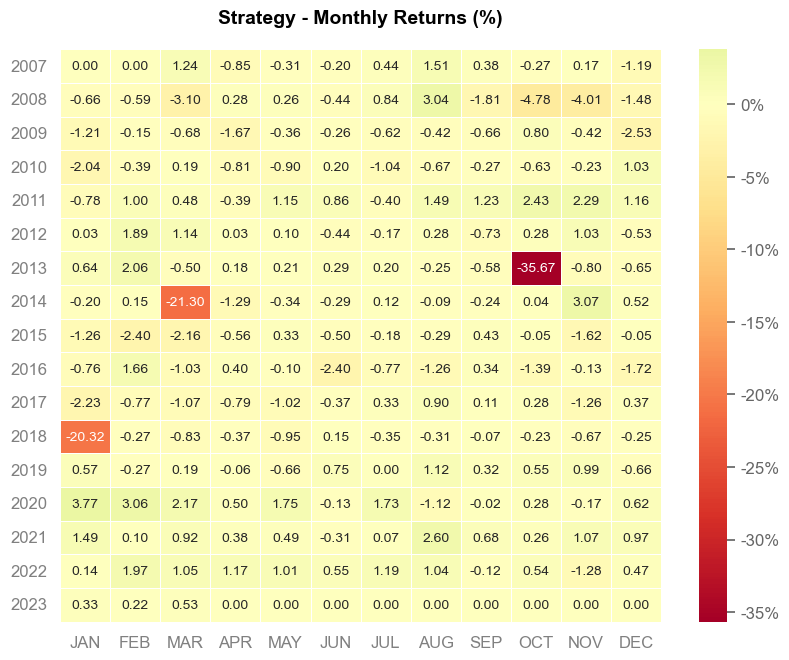

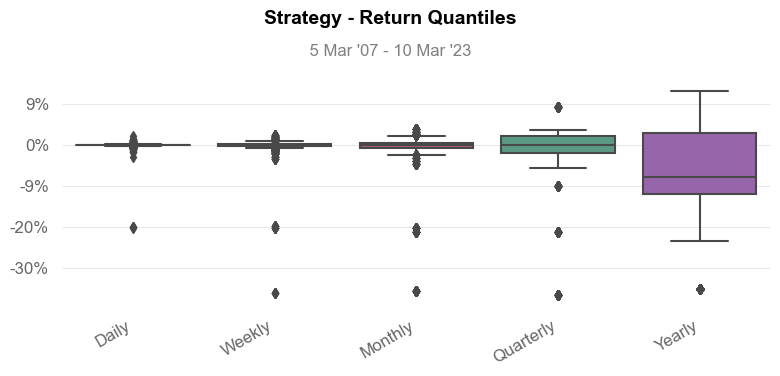

In [37]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H30

In [38]:
TF = 'M30'

In [39]:
data_1 = XAUUSD[TF]

In [40]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

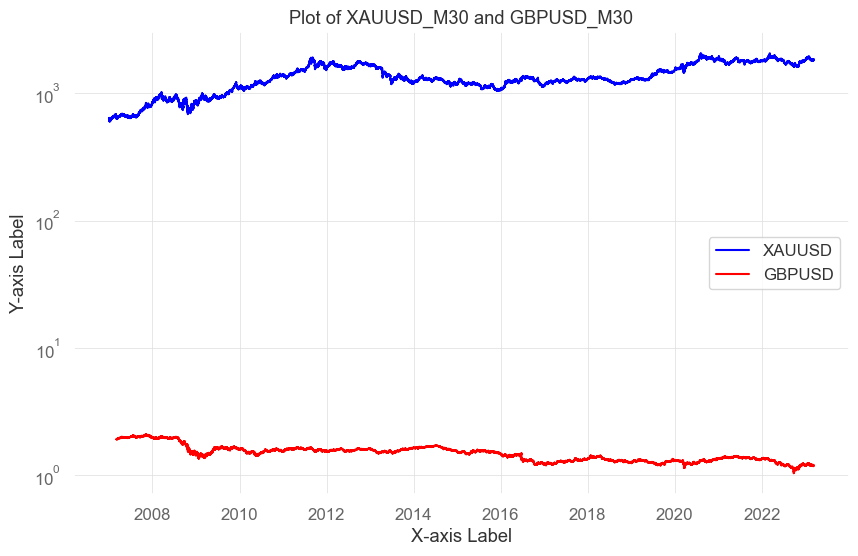

In [41]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [42]:
KF = Kalman_Filter(data_1, data_2)

In [43]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          1.571e+06
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:54:49   Log-Likelihood:                     -1.5130e+06
No. Observations:              200000   AIC:                                  3.026e+06
Df Residuals:                  199999   BIC:                                  3.026e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close        866.3595      0.691   1253.581      0.000     865.005     867.714
==============================================================================
Omnibus:                     8418.500   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9534.931
Skew:                          -0.535   Prob(JB):                         0.00
Kurtosis:                       3.020   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
result = KF.Run()

### Save Result Backtest 

In [45]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [46]:
filename = f'{Currency_Pair}_{TF}.csv'

In [47]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -72.96%
CAGR﹪                     -5.48%

Sharpe                     -0.52
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -0.44
Sortino                    -0.53
Smart Sortino              -0.45
Sortino/√2                 -0.37
Smart Sortino/√2           -0.32
Omega                      0.62

Max Drawdown               -76.78%
Longest DD Days            5294
Volatility (ann.)          11.19%
Calmar                     -0.07
Skew                       -27.69
Kurtosis                   786.37

Expected Daily %           -0.03%
Expected Monthly %         -0.68%
Expected Yearly %          -7.41%
Kelly Criterion            -30.42%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.18%
Expected Shortfall (cVaR)  -1.18%

Max Consec

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-09-11,2019-01-23,2023-03-10,5294,-76.778898,-76.709585
2,2007-12-28,2008-04-11,2008-09-09,257,-3.301831,-3.206678
3,2007-03-15,2007-04-23,2007-06-22,100,-1.077822,-1.009275
4,2007-08-27,2007-09-25,2007-10-29,64,-0.712885,-0.682797
5,2007-11-26,2007-12-11,2007-12-26,31,-0.668980,-0.591465


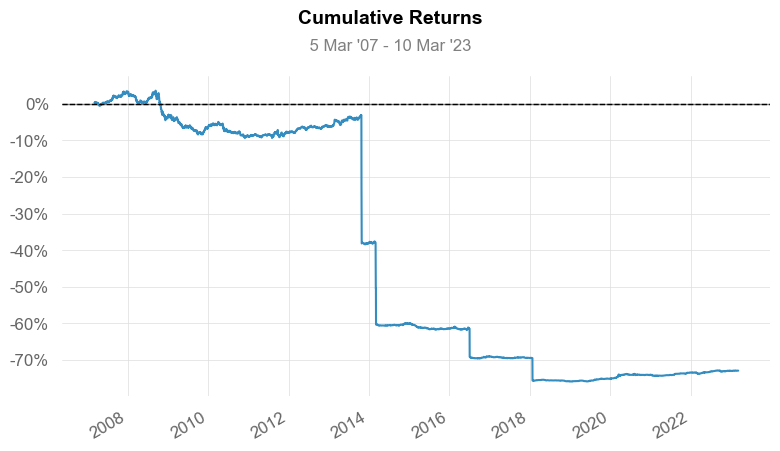

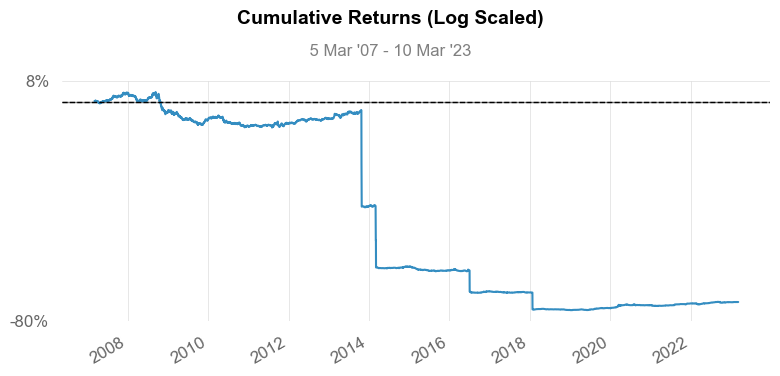

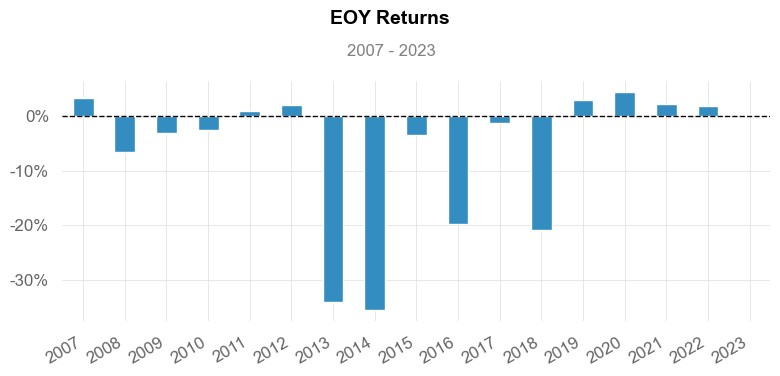

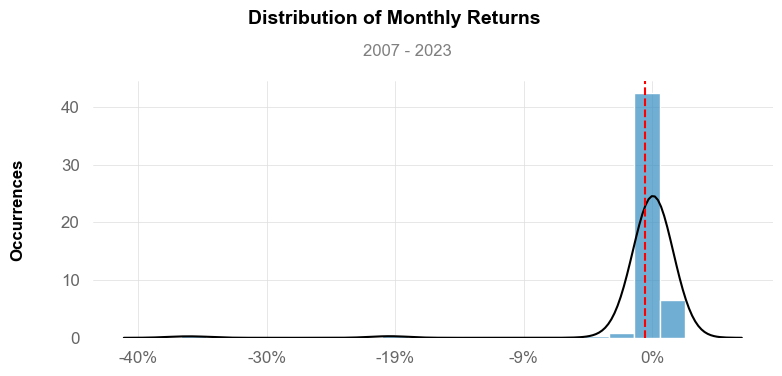

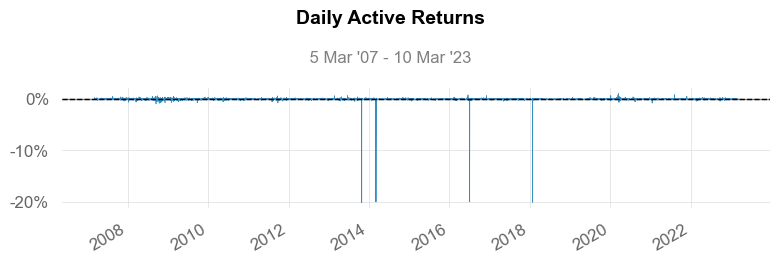

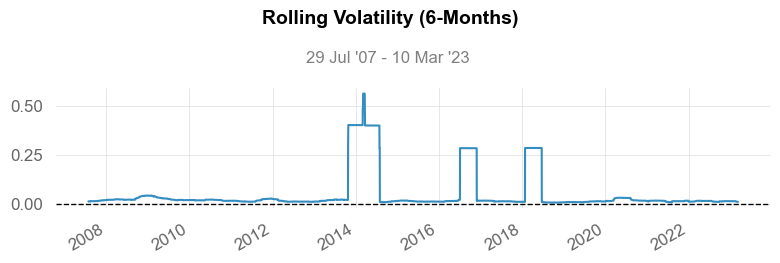

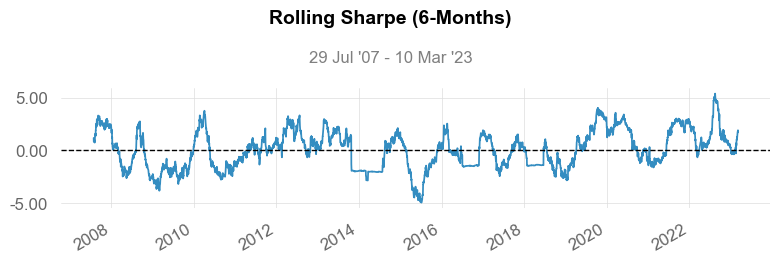

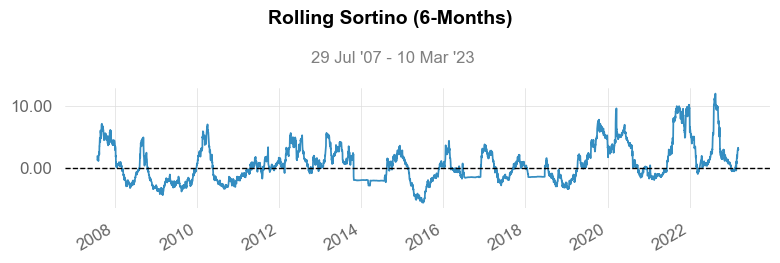

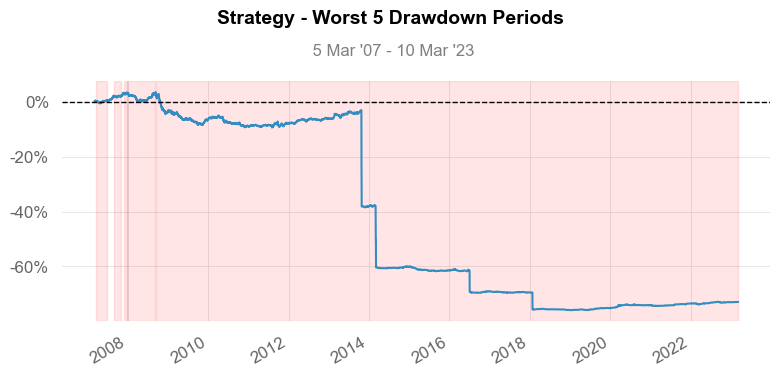

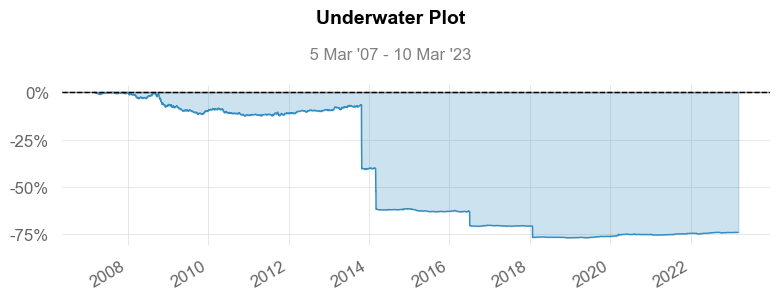

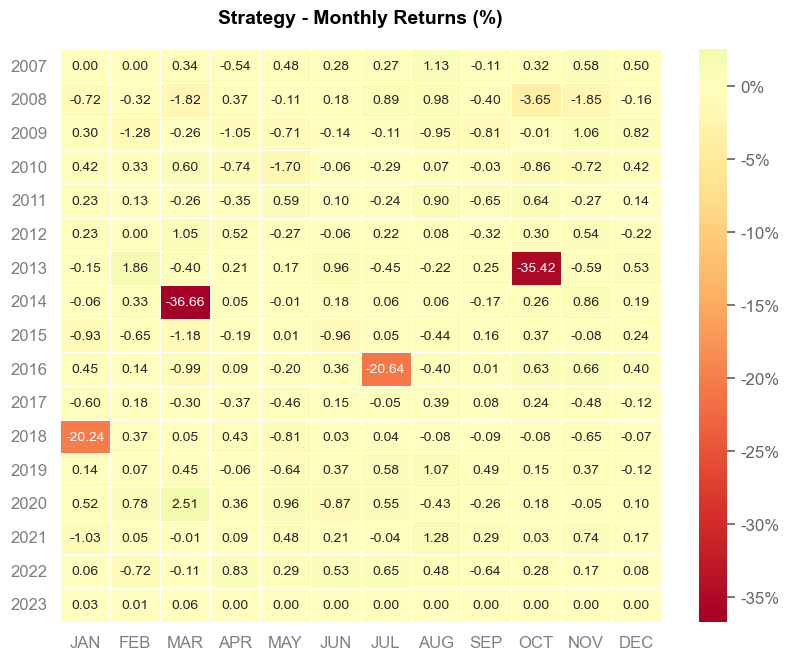

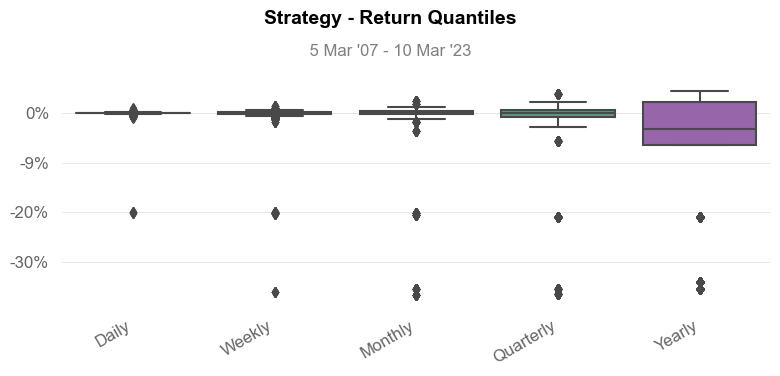

In [48]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())